# Cirq

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ionq-samples/getting-started/blob/main/cirq.ipynb)

[Cirq](https://github.com/quantumlib/Cirq) is a Python library for writing, manipulating, and optimizing quantum circuits and running them against quantum computers and simulators. It is designed to be flexible, and is suitable for use in a variety of quantum computing tasks.

In [4]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this 
# cell, so you can comment it out if you need help debugging this step.

%pip install cirq cirq_ionq matplotlib

In [5]:
import cirq, cirq_ionq, matplotlib.pyplot as plt, os
from getpass import getpass

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.

api_key = os.getenv('IONQ_API_KEY') or getpass('Enter your IonQ API key: ')

service = cirq_ionq.Service(api_key=api_key, default_target='simulator')

In [8]:
# Now we set up our circuit. In this case, we're creating a circuit with two
# qubits, applying an H gate to qubit-0, a CXGate to both, then measuring.

q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.H(q0),           # H
    cirq.CX(q0, q1),      # CNOT
    cirq.measure(q0, q1)  # Measure both qubits
)

In [ ]:
# Before submitting the job, we can visualize the circuit using print().

print(circuit)

0: ───H───@───M───
          │   │
1: ───────X───M───


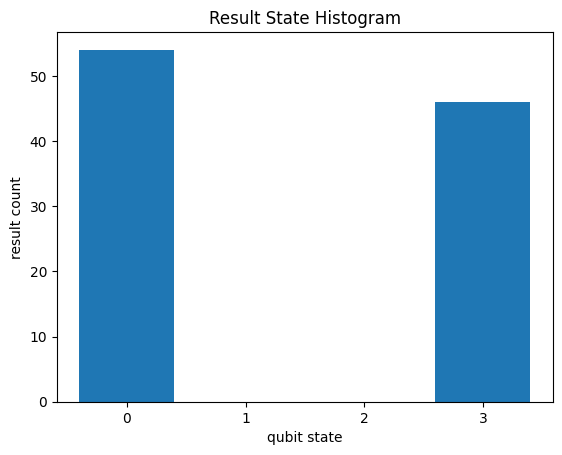

In [ ]:
result = service.run(circuit, name="Cirq example", repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()